In [1]:
import sys
sys.path.append('../src')
import scipy.io
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from world import Patch, Agent
import logging
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

In [2]:
from analytical_model_fit import load_data, group_data
from utils import calculate_aic_bic, calculate_subject_aic_bic

In [3]:
patches = {
    'low': Patch(32.5, 0.075, 'exponential'),
    'med': Patch(45, 0.075, 'exponential'),
    'high': Patch(57.5, 0.075, 'exponential')
}

In [3]:
df_trials, block_order_df, data = load_data()

# Group data
grouped_df = group_data(df_trials)

2024-08-23 10:45:11,452 - INFO - Loading data...
2024-08-23 10:45:11,472 - INFO - Grouping trial data by subject, environment, and patch...


In [5]:
policy_type = "mellowmax"
mellowmax_type = 'add' if policy_type == 'mellowmax' else None

### Visualizing Fits

In [14]:
policy_type = "mellowmax"
mellowmax_type = "add"
path = f"../src/optimization_results_{policy_type}_{mellowmax_type}.csv"

In [15]:
res_df = pd.read_csv(path)

In [16]:
res_df[res_df["sub"]==3]

,sub,env,case,policy_type,fitted_parameter,fitted_intercept,predicted_leaveT,actual_mean_leaveT
4,3,1,fix_parameter_fix_c,mellowmax,0.889794,-17.754732,19.395503,16.733743
5,3,2,fix_parameter_fix_c,mellowmax,0.889794,-17.754732,17.521906,20.564042
82,3,1,vary_parameter_vary_c,mellowmax,0.682923,-26.586137,16.851671,16.733743
83,3,2,vary_parameter_vary_c,mellowmax,1.235322,-11.958340,20.686397,20.564042
160,3,1,vary_parameter_fix_c,mellowmax,0.669663,-17.754732,16.807775,16.733743
161,3,2,vary_parameter_fix_c,mellowmax,1.237001,-17.754732,20.605334,20.564042
238,3,1,fix_parameter_vary_c,mellowmax,0.889794,-3793.402649,16.985273,16.733743
239,3,2,fix_parameter_vary_c,mellowmax,0.889794,2.295931,20.511079,20.564042


In [5]:
def plot_environment_case(data, case_name, actual_col, predicted_col):
    # Filter data for the specific case
    case_data = data[data['case'] == case_name]
    
    # Plot settings
    fig, axes = plt.subplots(1, 2, figsize=(6, 3), sharex=True, sharey=True)
    
    # Define colors for the environments
    colors = {1: 'blue', 2: 'green'}
    
    # Loop through each environment (1 and 2)
    for env, ax in zip([1, 2], axes):
        # Filter data for the environment
        env_data = case_data[case_data['env'] == env]
        
        # Calculate correlation
        r, _ = pearsonr(env_data[actual_col], env_data[predicted_col])
        
        # Scatter plot with specified color
        sns.scatterplot(
            x=actual_col, y=predicted_col, data=env_data, ax=ax,
            color=colors[env]
        )
        
        # Plot a line for y=x
        ax.plot([0, env_data[actual_col].max()], 
                [0, env_data[predicted_col].max()], 
                'k--', lw=2)
        
        # Set title and labels
        ax.set_title(f'{case_name} - {"Rich" if env == 1 else "Poor"} \nr = {r:.2f}')
        ax.set_xlabel('mean Subject Leaving Times (s)')
        ax.set_ylabel('mean Model Leaving Times (s)')
    
    plt.tight_layout()
    plt.show()

# # Loop through all cases and plot
# for case in res_df['case'].unique():
#     plot_environment_case(res_df, case, 'actual_mean_leaveT', 'predicted_leaveT')

# For softmax (analytical fits)

In [4]:
res_soft_df = pd.read_csv("../src/optimization_results_softmax.csv")
res_soft_df[res_soft_df["sub"]==3]

,sub,env,case,policy_type,fitted_parameter,fitted_intercept,predicted_leaveT,actual_mean_leaveT,predicted_std_leaveT,actual_std_leaveT
4,3,1,fix_parameter_fix_c,softmax,0.073163,1.474161,19.548446,16.733743,8.517260,1.652903
5,3,2,fix_parameter_fix_c,softmax,0.073163,1.474161,17.257057,20.564042,7.239171,2.007353
82,3,1,vary_parameter_vary_c,softmax,0.364397,-4.343233,16.733739,16.733743,5.895318,1.652903
83,3,2,vary_parameter_vary_c,softmax,0.801783,-6.513515,20.564046,20.564042,6.193638,2.007353
160,3,1,vary_parameter_fix_c,softmax,0.057667,1.474161,16.892092,16.733743,7.746407,1.652903
161,3,2,vary_parameter_fix_c,softmax,0.098474,1.474161,20.654309,20.564042,8.154230,2.007353
238,3,1,fix_parameter_vary_c,softmax,0.073163,1.126248,16.765131,16.733743,7.308722,1.652903
239,3,2,fix_parameter_vary_c,softmax,0.073163,1.829577,20.597678,20.564042,8.749037,2.007353
316,3,1,no_intercept,softmax,0.364397,0.000000,30.595249,16.733743,11.014192,1.652903
317,3,2,no_intercept,softmax,0.809460,0.000000,38.529268,20.564042,12.735959,2.007353


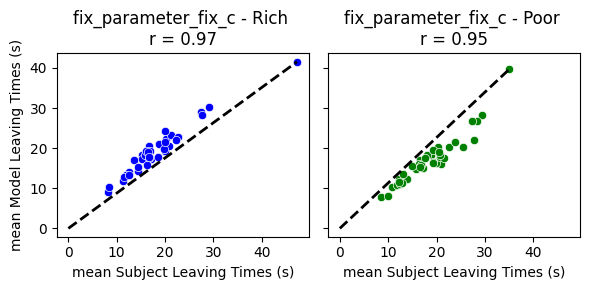

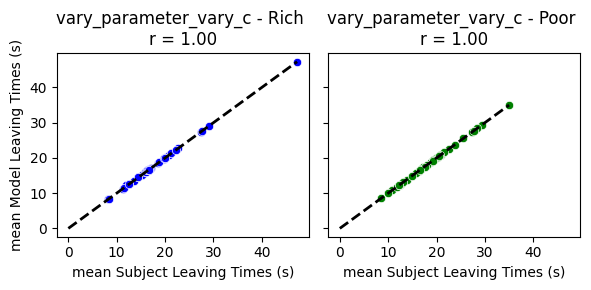

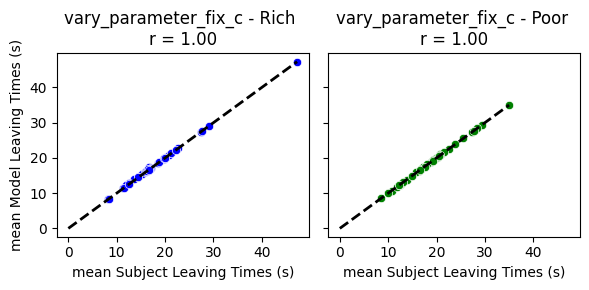

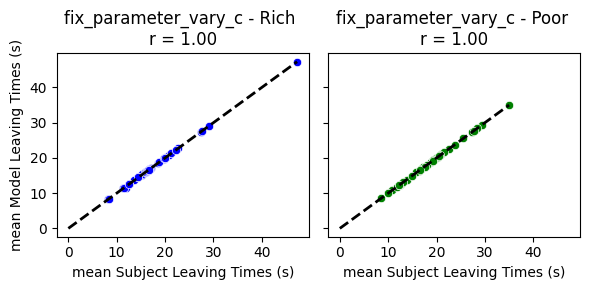

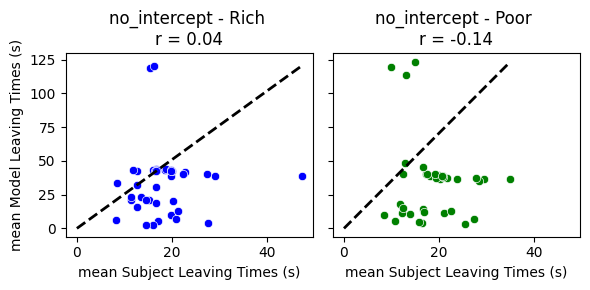

In [50]:
# Loop through all cases and plot
for case in res_soft_df['case'].unique():
    plot_environment_case(res_soft_df, case, 'actual_mean_leaveT', 'predicted_leaveT')

### Model fit's performance on standard deviation of leave times (Softmax)

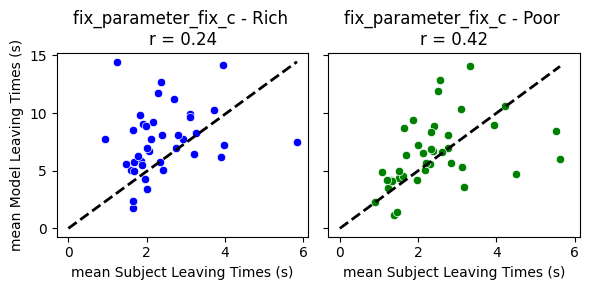

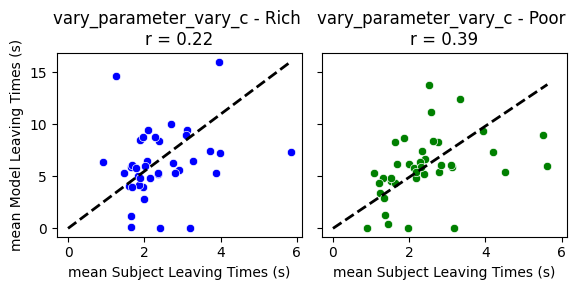

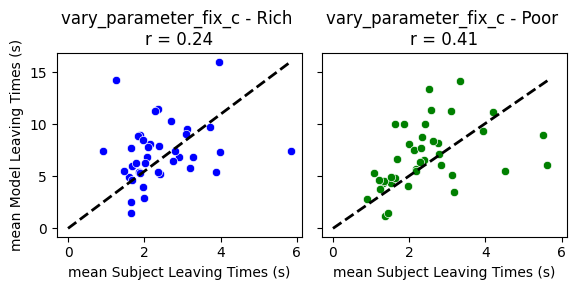

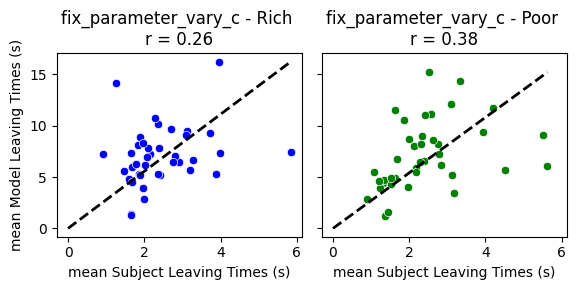

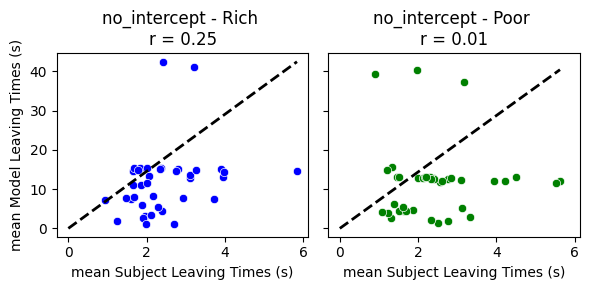

In [52]:
for case in res_soft_df['case'].unique():
    plot_environment_case(res_soft_df, case, 'actual_std_leaveT', 'predicted_std_leaveT')

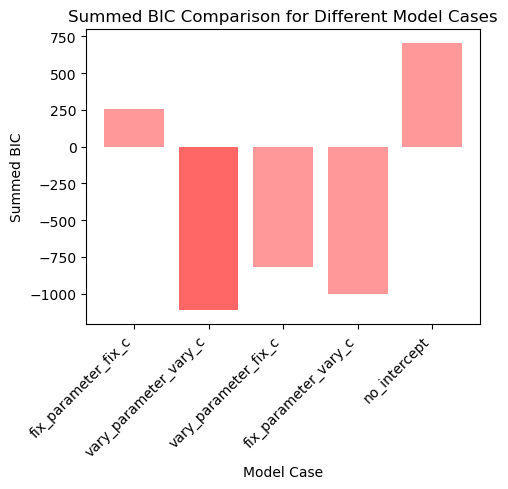

In [9]:
# filtered_df = res_soft_df[res_soft_df['case'] != 'no_intercept']
# plot_bic(filtered_df)
plot_bic(res_soft_df)

# Mellowmax Add

In [5]:
res_mellow_df = pd.read_csv("../src/optimization_results_mellowmax_add_new.csv")
res_mellow_df[res_mellow_df["sub"]==3]

,sub,env,case,policy_type,fitted_parameter,fitted_intercept,predicted_leaveT,actual_mean_leaveT,predicted_std_leaveT,actual_std_leaveT
4,3,1,fix_parameter_fix_c,mellowmax,0.889794,-17.754732,19.395503,16.733743,8.402664,1.652903
5,3,2,fix_parameter_fix_c,mellowmax,0.889794,-17.754732,17.521906,20.564042,7.017473,2.007353
82,3,1,vary_parameter_vary_c,mellowmax,0.682923,-26.586137,16.851671,16.733743,7.394955,1.652903
83,3,2,vary_parameter_vary_c,mellowmax,1.235322,-11.958340,20.686397,20.564042,8.209249,2.007353
160,3,1,vary_parameter_fix_c,mellowmax,0.669663,-17.754732,16.807775,16.733743,7.426916,1.652903
161,3,2,vary_parameter_fix_c,mellowmax,1.237001,-17.754732,20.605334,20.564042,8.138271,2.007353
238,3,1,fix_parameter_vary_c,mellowmax,0.889794,-3793.402649,16.985273,16.733743,6.791911,1.652903
239,3,2,fix_parameter_vary_c,mellowmax,0.889794,2.295931,20.511079,20.564042,12.741361,2.007353
316,3,1,no_intercept,mellowmax,0.668361,0.000000,17.370338,16.733743,7.915210,1.652903
317,3,2,no_intercept,mellowmax,1.286250,0.000000,21.506002,20.564042,8.718652,2.007353


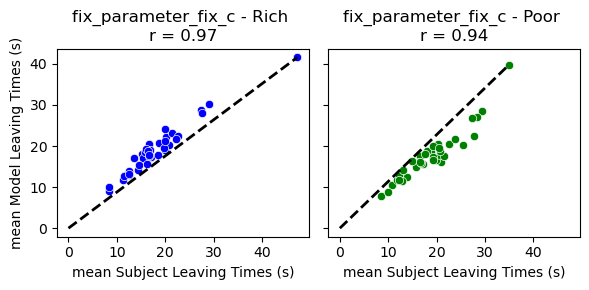

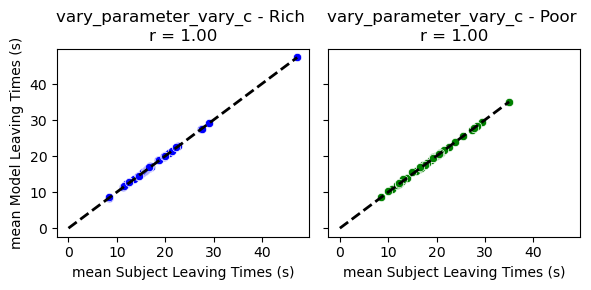

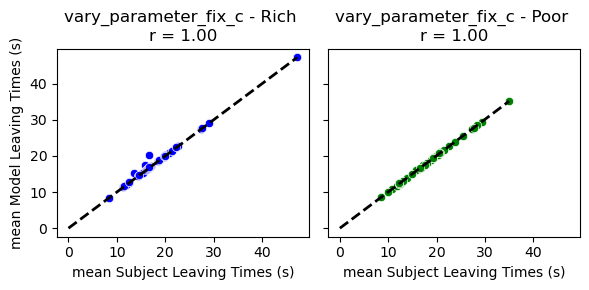

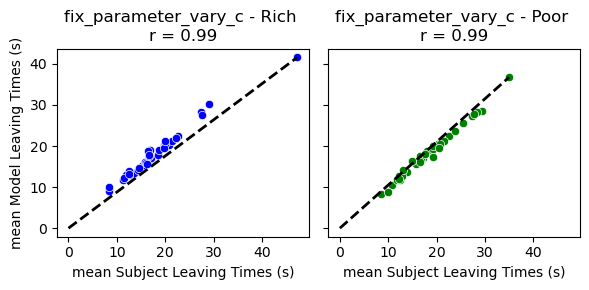

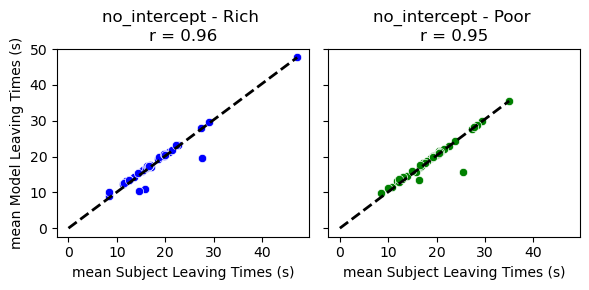

In [7]:
# Loop through all cases and plot
for case in res_mellow_df['case'].unique():
    plot_environment_case(res_mellow_df, case, 'actual_mean_leaveT', 'predicted_leaveT')

### Model fit's performance on standard deviation of leave times (Mellowmax)

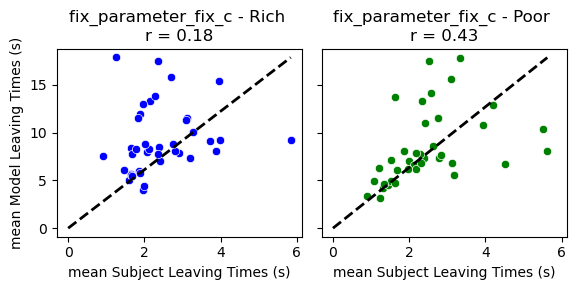

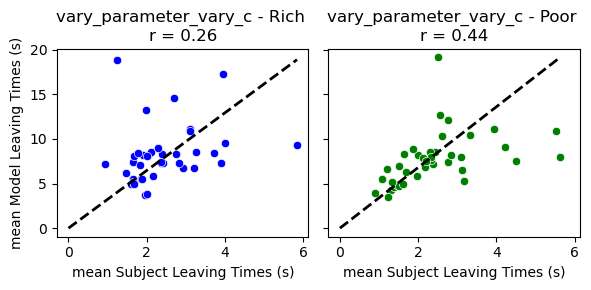

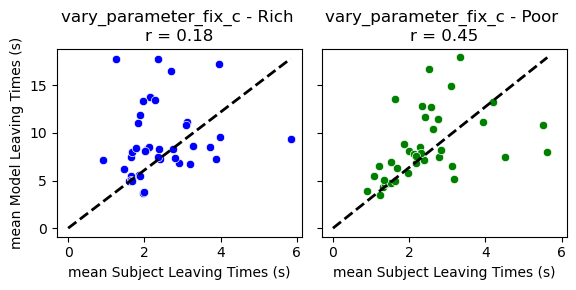

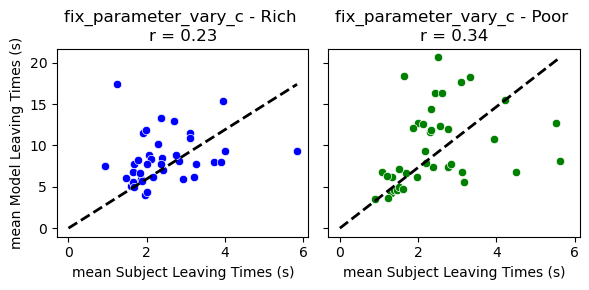

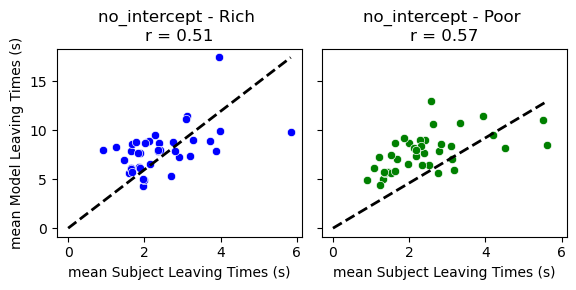

In [8]:
for case in res_mellow_df['case'].unique():
    plot_environment_case(res_mellow_df, case, 'actual_std_leaveT', 'predicted_std_leaveT')

In [6]:
def plot_bic(df_results):
    case_results = []
    for case in df_results.case.unique():
        case_df = df_results[df_results['case'] == case]
        k = 2 if 'no_intercept' in case else 1
        bic_df = calculate_subject_aic_bic(case_df, 'predicted_leaveT', k)
        total_bic = bic_df['bic'].sum()
        
        case_results.append({
            'case': case,
            'total_bic': total_bic
        })

    summed_bic_df = pd.DataFrame(case_results)
    min_bic_value = summed_bic_df['total_bic'].min()
    best_case = summed_bic_df[summed_bic_df['total_bic'] == min_bic_value]['case'].iloc[0]

    plt.figure(figsize=(5, 5))

    # Plot all bars in pink, and the best one in a darker pink
    colors = ['#ff9999' if case != best_case else '#ff6666' for case in summed_bic_df['case']]

    plt.bar(summed_bic_df['case'], summed_bic_df['total_bic'], color=colors)
    plt.xlabel('Model Case')
    plt.ylabel('Summed BIC')
    plt.title('Summed BIC Comparison for Different Model Cases')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


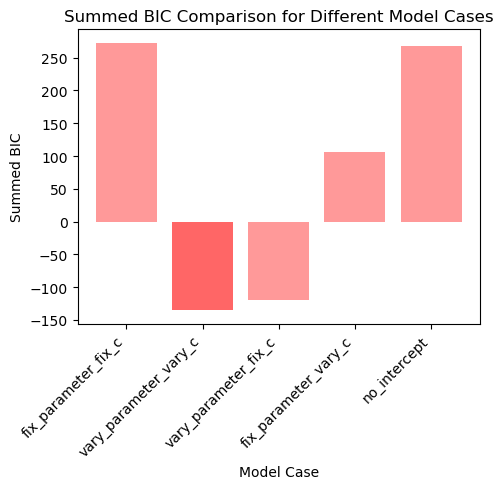

In [7]:
plot_bic(res_mellow_df)